In [62]:
import matplotlib.pyplot as plt
from IPython.display import Image

import pickle
import matplotlib.pyplot as plt
import numpy as np
import torch
import random

from dataset_mod import ImageData
from torch.utils.data import DataLoader
from solver import reconstruction_loss, kl_divergence, to_var
from model import conv_VAE


%load_ext autoreload
%autoreload 2
FILENAME = "/Volumes/RCONCI/2 digits colours/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
train_dataset = ImageData(FILENAME, mode='train')
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=False, num_workers=2)


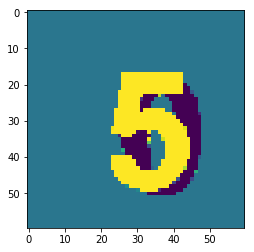

In [80]:
img_x, img_y = train_loader.dataset.__getitem__(5)
plt.imshow(img_x[0,:,:])

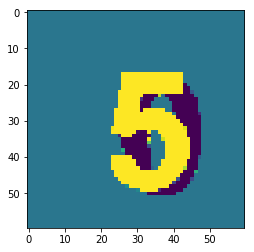

In [77]:
plt.imshow(img_y[0,:,:])

In [58]:
vae = conv_VAE()
optimizer = torch.optim.Adam(vae.parameters(), lr=1e-3)

In [34]:
epochs = 20
beta = 1
bs = 128

In [44]:
for epoch in range(epochs):
    for idx, (x, y) in enumerate(train_loader):
        x = to_var(x)
        #x = Variable(cuda(x, self.use_cuda))
        x_recon, mu, logvar = vae(x)
        recon_loss = reconstruction_loss(y, x_recon, 'gaussian')
        total_kld, dim_wise_kld, mean_kld = kl_divergence(mu, logvar)
        
        beta_vae_loss = recon_loss + beta*total_kld

        optimizer.zero_grad()
        beta_vae_loss.backward()
        optimizer.step()
        
        if idx%100 == 0:
            print("Epoch[{}/{}] Loss: {:.3f}".format(epoch+1, epochs, beta_vae_loss.data[0]/bs))
    
            #recon_x, _, _ = vae(fixed_x)
            #save_image(recon_x.view(recon_x.size(0), 1, 28, 28).data.cpu(), f'reconstructed/recon_image_{epoch}_{idx}.png')

torch.Size([128, 32, 4, 4])
torch.Size([128, 512])
torch.Size([128, 1, 59, 59])


RuntimeError: shape '[128, 1, 60, 60]' is invalid for input of size 445568

In [ ]:
sample = Variable(torch.randn(128, 20))
test_recon = vae._decode(sample)
# recon_x, _, _ = vae(fixed_x)

save_image(test_recon.view(test_recon.size(0), 1, 28, 28).data.cpu(), 'sample_image.png')
Image('sample_image.png')